In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


here is startup data in which 50 different startups are given in data:
- with money used in Research and Development
- money spend on marketing 
- total profit generate

In [109]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


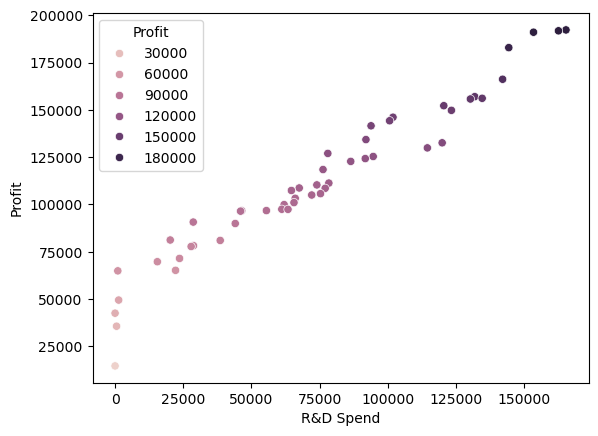

In [10]:
sns.scatterplot(x='R&D Spend',y='Profit',data=data, hue='Profit')
plt.show()

### By these graph we can easily see  if we increase in Reasearch and development than we can see there is 
### huge growth in Profit 

<Axes: xlabel='R&D Spend', ylabel='Profit'>

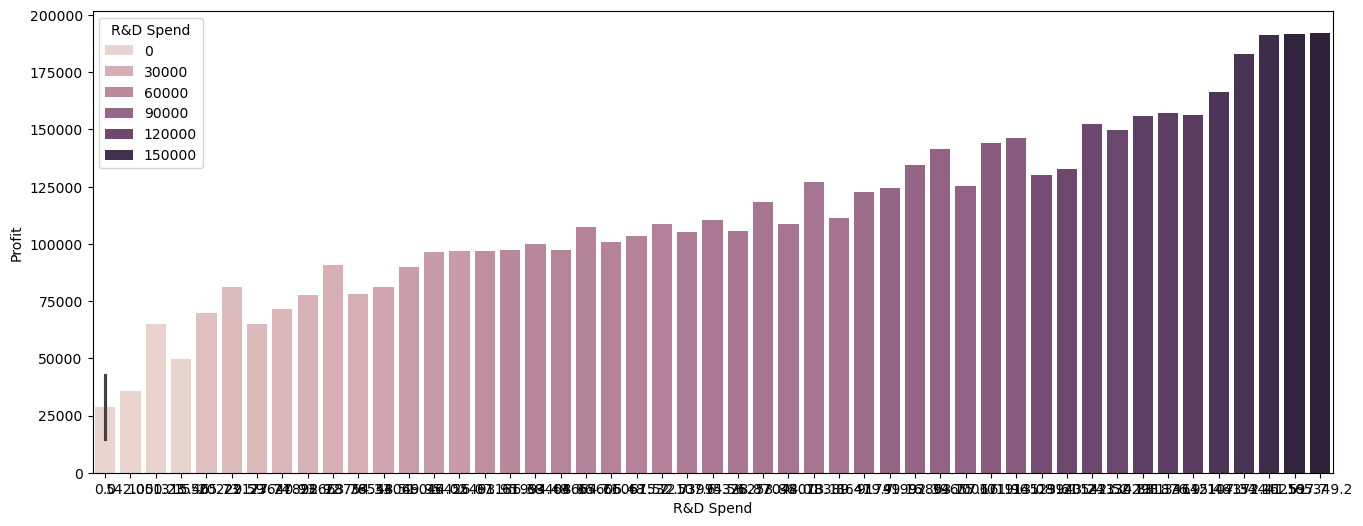

In [12]:
plt.figure(figsize=(16,6))
sns.barplot(y='Profit',x='R&D Spend', data=data , hue="R&D Spend")
# sns.barplot(y='Profit',x='R&D Spend', data=data , hue="State")

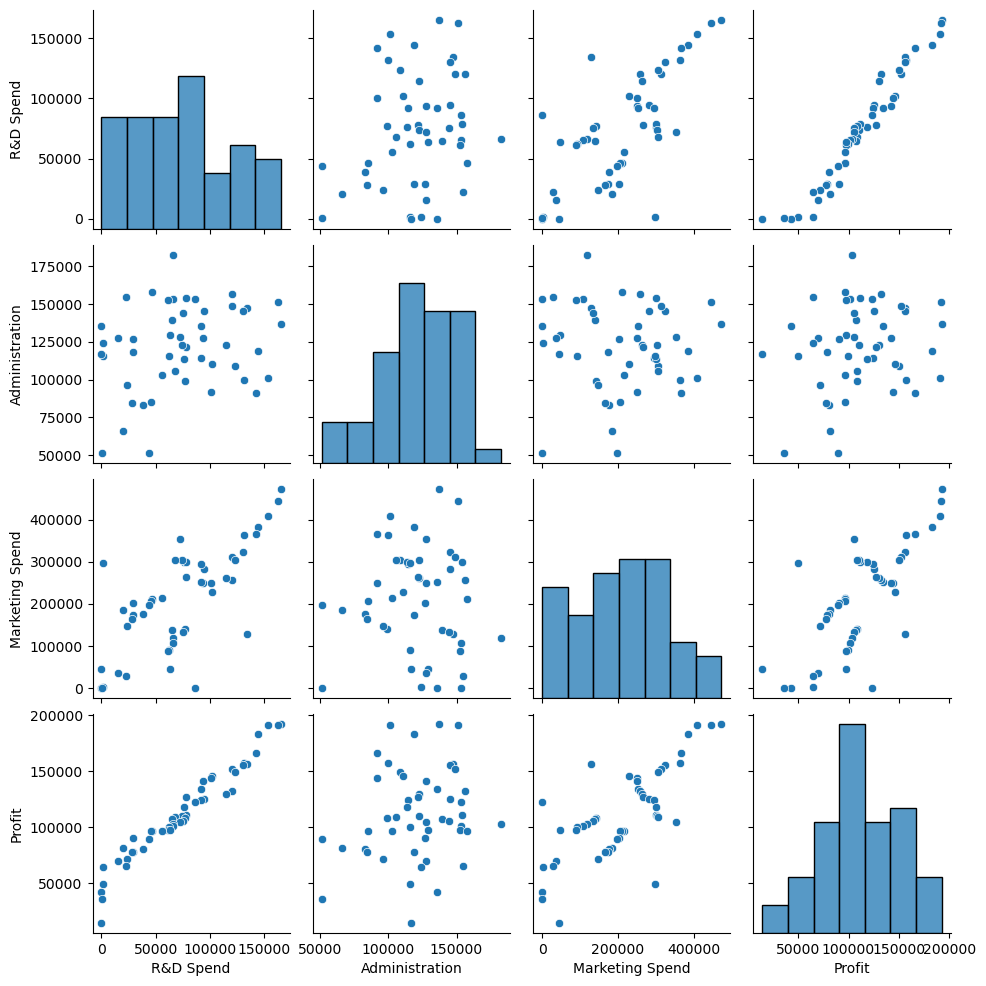

In [14]:
sns.pairplot(data)
plt.show()

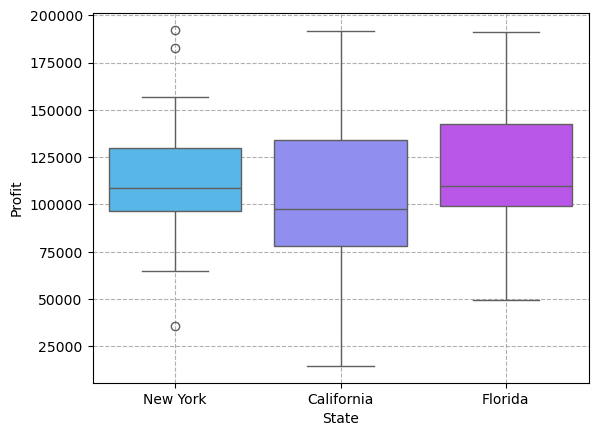

In [15]:
sns.boxplot(y='Profit',x='State',data=data,palette="cool",hue="State")
plt.grid(linestyle="--",alpha=1)

<Axes: xlabel='State', ylabel='R&D Spend'>

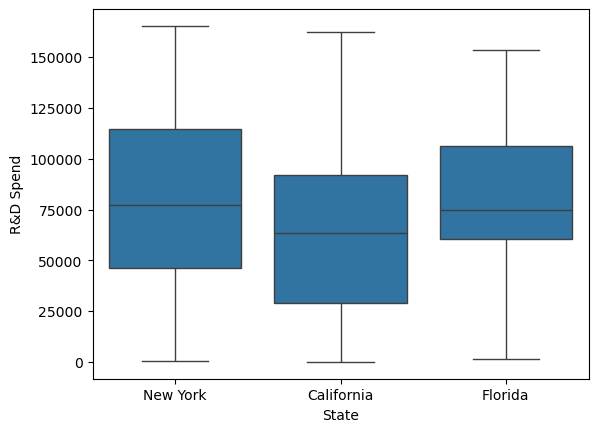

In [16]:
sns.boxplot(y='R&D Spend',x='State',data=data)

<Axes: xlabel='Profit'>

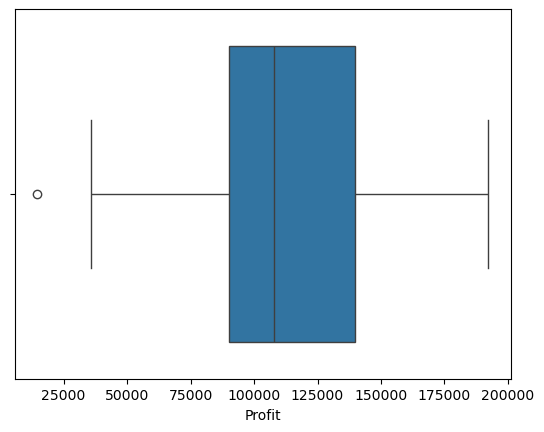

In [135]:
sns.boxplot(x='Profit',data=data)


<Axes: xlabel='R&D Spend'>

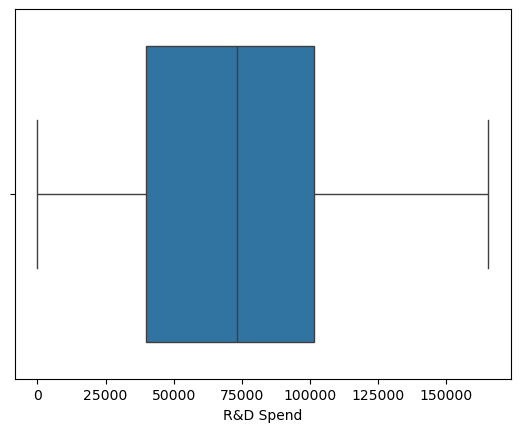

In [137]:
sns.boxplot(x='R&D Spend',data=data)

<Axes: xlabel='Administration'>

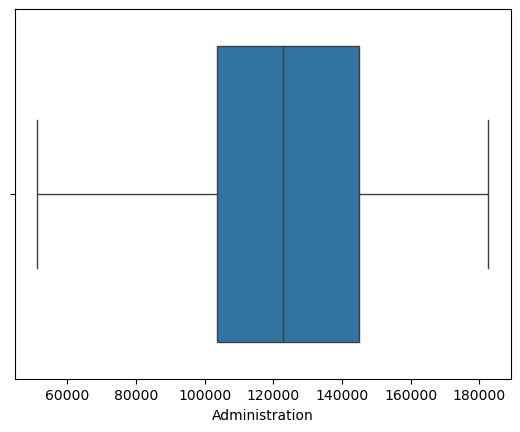

In [141]:
sns.boxplot(x='Administration',data=data)


<Axes: xlabel='R&D Spend', ylabel='Count'>

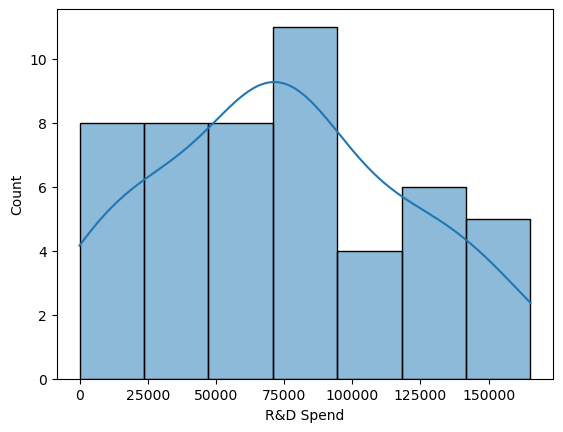

In [35]:
sns.histplot(x='R&D Spend',data=data,kde=True)

In [33]:
data['R&D Spend'].skew()

0.164002172321177

-0.4890248099671768

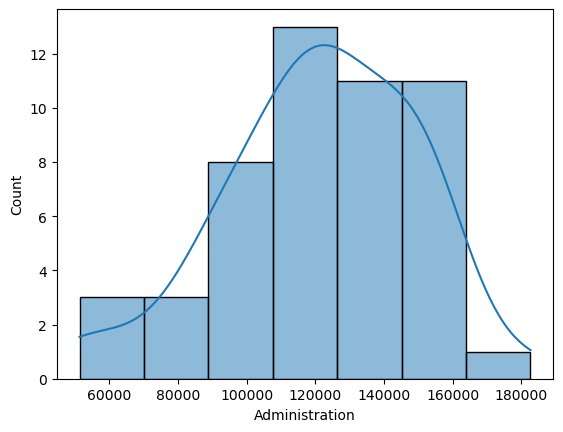

In [69]:
sns.histplot(x='Administration',data=data,kde=True)
data.Administration.skew()

0.023291019769116614

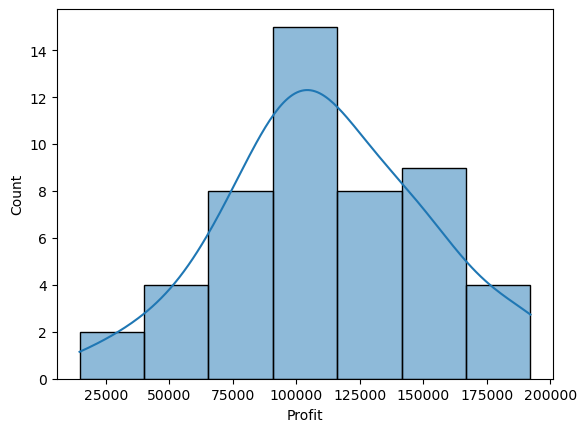

In [125]:
sns.histplot(x='Profit',data=data ,kde=True)
data.Profit.skew()

In [59]:
data['R&D Spend'].skew()

0.164002172321177

<Axes: >

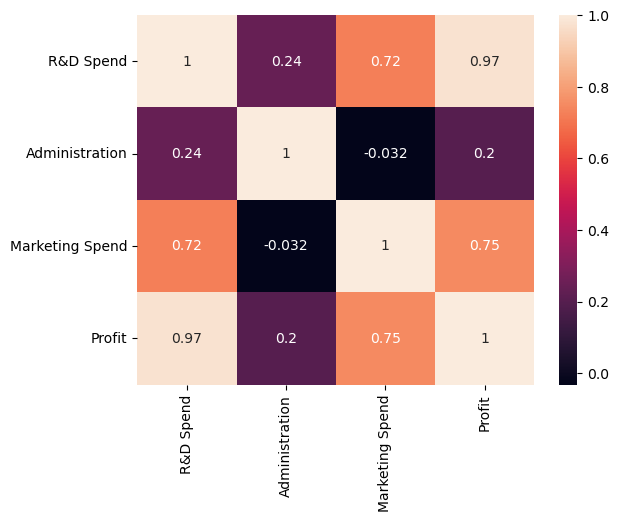

In [121]:
sns.heatmap(data.drop('State', axis=1).corr(), annot=True)
# data.drop('State', axis=1).corr()


In [154]:
aa=data.drop(['State'],axis=1).corr()

<Axes: >

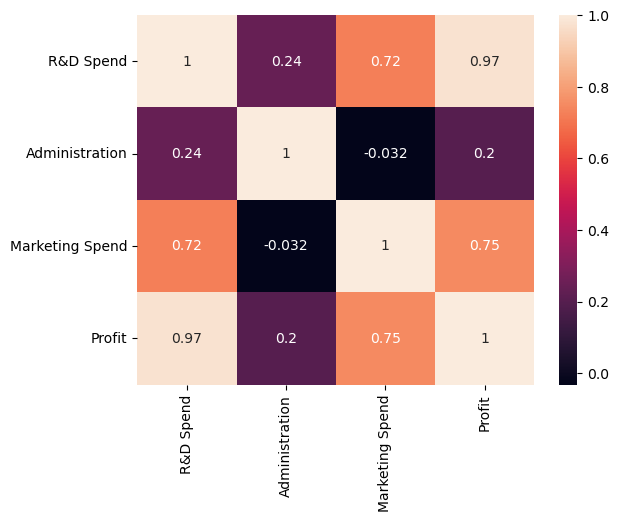

In [160]:
sns.heatmap(aa,annot=True)

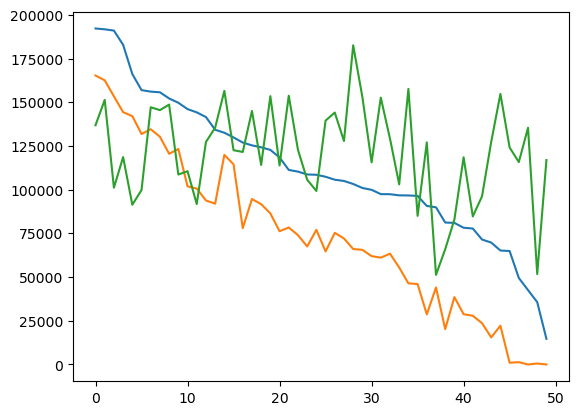

In [176]:
plt.plot(data.Profit)
plt.plot(data['R&D Spend'])
plt.plot(data.Administration)

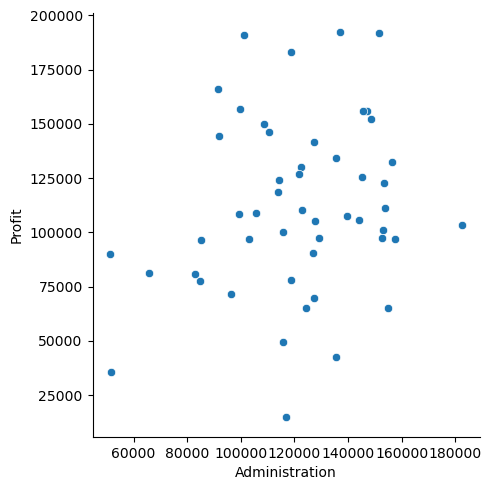

In [182]:
sns.relplot(x='Administration',y="Profit",data=data)

In [192]:
aa=data.drop(['State'],axis=1).corr()

Data Modeling

In [297]:
X=data[['R&D Spend','Marketing Spend','Administration']]
y=data.Profit

In [299]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [301]:
from sklearn.model_selection import train_test_split

In [315]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [317]:
X_train

,R&D Spend,Marketing Spend,Administration
12,93863.75,249839.44,127320.38
4,142107.34,366168.42,91391.77
37,44069.95,197029.42,51283.14
8,120542.52,311613.29,148718.95
3,144372.41,383199.62,118671.85
6,134615.46,127716.82,147198.87
41,27892.92,164470.71,84710.77
46,1315.46,297114.46,115816.21
47,0.00,0.00,135426.92
15,114523.61,261776.23,122616.84


In [319]:
# from sklearn.linear_model import LinearRegression
# LR=LinearRegression() # object creation
# LR.fit(X_train,y_train) # training of linear regression

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [329]:
y_predict=LR.predict(X_test)
# y_predict=LR.predict(X_test)

In [361]:
y_predict

array([126703.02716461,  84894.75081556,  98893.41815974,  46501.70815036,
       129128.39734381,  50992.69486261, 109016.5536578 , 100878.4641454 ,
        97700.59638629, 113106.15292226])

In [363]:
y_test

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
Name: Profit, dtype: float64

In [359]:
LR.predict([[1500,900,500]])

E:\newanaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([55271.69746374])

In [373]:

R_D,Marketing,Administration = int(input('enter R&D Spend: ')),int(input('enter no for MS:')),int(input('enter no for Admin:'))
prof=R_D*0.80377928+  Marketing*0.03124155+ Administration*-0.06792917+54071.87574599087


enter R&D Spend:  2000
enter no for MS: 13444
enter no for Admin: 12341


In [375]:
prof

55261.13181722087

In [369]:
LR.coef_

array([ 0.80377928,  0.03124155, -0.06792917])

In [371]:
LR.intercept_

54071.87574599087

In [405]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [407]:
r2score=r2_score(y_test,y_predict)
r2score

0.9000653083037319

In [421]:
import math
mse=mean_squared_error(y_test,y_predict)
mse

80926321.22295173

80926321.22295173


In [411]:
X_test.shape

(10, 3)

In [413]:
adjusted_r2_score=(1-0.9**2)*(10-1)/(10-3-1)

In [415]:
adjusted_r2_score

0.2849999999999999

In [425]:
import math
print(mean_squared_error(y_test,y_predict))

80926321.22295173


In [429]:
print(math.sqrt(mean_squared_error(y_test,y_predict)))

8995.905803361422


In [431]:
print(mean_absolute_error(y_test,y_predict))

6979.152252370407
